In [1]:
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np

training_image_path = 'datasets/training/'
training_tnf_csv    = 'training_data/tps'

train_pd = pd.read_csv(training_tnf_csv + '/train.csv') 

/var/folders/tl/_smmzcf56jn3pnwyc8ggqhdc0000gn/T/ipykernel_81885/2939674786.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transforms_pd = transforms_pd.append({
/var/folders/tl/_smmzcf56jn3pnwyc8ggqhdc0000gn/T/ipykernel_81885/2939674786.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transforms_pd = transforms_pd.append({
/var/folders/tl/_smmzcf56jn3pnwyc8ggqhdc0000gn/T/ipykernel_81885/2939674786.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transforms_pd = transforms_pd.append({
/var/folders/tl/_smmzcf56jn3pnwyc8ggqhdc0000gn/T/ipykernel_81885/2939674786.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transforms_pd =

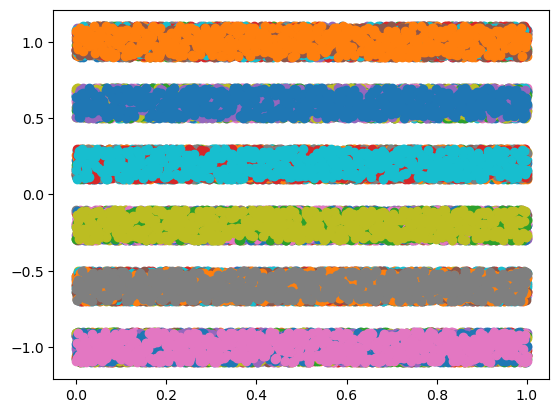

In [2]:
transforms_pd = pd.DataFrame(columns=['Parameter','Min','Max'])

# Find the min & max values of each parameter
for i in range(1,73):
    name = 't' + str(i)
    data = train_pd[name]
    plt.scatter(np.linspace(0, 1, len(data)), data)
    
    transforms_pd = transforms_pd.append({
        'Parameter': name, 
        'Min':       np.amin(data), 
        'Max':       np.amax(data)    
        }, ignore_index=True)

In [3]:
def random_transform(pd, image_name='', name=True):
    """
    Create a random transform by sampling from each parameter. 
    Assume a uniform distribution between min & max values.
    """
    
    output = {}
    if name:
        output['ImageA'] = image_name
        output['ImageB'] = image_name
    
    for i in range(1,73):
        name    = 't' + str(i)
        row     = pd[pd['Parameter']==name]
        value   = np.random.uniform(row['Min'], row['Max'])[0]
        output[name] = [value]
        
    return output

### Add MRI images

In [4]:
file_names = ['HMU_003_DB', 'HMU_011_MQ', 'HMU_025_SH']

in_vivo = {
    'HMU_003_DB': [20,19,12],
    'HMU_007_TN': [19,18,16],
    'HMU_010_FH' : [19,17,13,12],
    'HMU_011_MQ': [18,12,10,9],
    'HMU_025_SH': [22,19,15]
}

updated_train_pd = train_pd.copy()
number_samples   = 0

for name in file_names:
    # MRI 
    mri_slices = in_vivo[name]
    for slice in mri_slices:
        image_name  = 'mri_' + name + '_' + str(slice) + '.png'
        new_row     = random_transform(transforms_pd, image_name)
        
        new_row_pd       = pd.DataFrame.from_dict(new_row)
        updated_train_pd = pd.concat((updated_train_pd, new_row_pd), ignore_index=True)
        
        number_samples += 1

20


,ImageA,ImageB,t1,t2,t3,t4,t5,t6,t7,t8,...,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72
0,hist_TCIA-0001_slice1.png,hist_TCIA-0001_slice1.png,-0.928000,-1.060000,-1.080000,-1.070000,-0.925000,-0.917000,-0.549000,-0.536000,...,-0.290000,0.163000,0.510000,0.949000,-1.090000,-0.622000,-0.210000,0.162000,0.636000,1.070000
1,hist_TCIA-0001_slice2.png,hist_TCIA-0001_slice2.png,-0.911000,-0.973000,-0.904000,-1.040000,-0.913000,-0.986000,-0.579000,-0.649000,...,-0.279000,0.296000,0.557000,1.000000,-1.070000,-0.694000,-0.134000,0.103000,0.555000,0.981000
2,hist_TCIA-0002_slice1.png,hist_TCIA-0002_slice1.png,-1.030000,-0.908000,-0.999000,-0.960000,-1.030000,-0.909000,-0.521000,-0.689000,...,-0.185000,0.257000,0.626000,1.070000,-0.972000,-0.577000,-0.250000,0.202000,0.578000,1.020000
3,hist_TCIA-0002_slice2.png,hist_TCIA-0002_slice2.png,-0.926000,-1.050000,-0.901000,-0.958000,-0.931000,-0.987000,-0.545000,-0.667000,...,-0.184000,0.214000,0.626000,1.040000,-0.910000,-0.562000,-0.172000,0.261000,0.548000,0.950000
4,hist_TCIA-0004_slice1.png,hist_TCIA-0004_slice1.png,-1.010000,-1.020000,-0.930000,-0.978000,-1.050000,-0.966000,-0.523000,-0.594000,...,-0.157000,0.167000,0.667000,1.030000,-1.050000,-0.585000,-0.292000,0.286000,0.507000,1.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,mri_HMU_025_SH_19.png,mri_HMU_025_SH_19.png,-1.058945,-1.011419,-1.065669,-1.066001,-1.045085,-1.097236,-0.509207,-0.633457,...,-0.171923,0.195208,0.646000,0.978591,-0.959948,-0.599820,-0.202056,0.130002,0.519429,0.942958
626,mri_HMU_025_SH_15.png,mri_HMU_025_SH_15.png,-0.996713,-0.926157,-0.905928,-0.977932,-0.906883,-1.070299,-0.544016,-0.526819,...,-0.233548,0.284606,0.627008,1.003496,-1.088777,-0.584008,-0.148541,0.244253,0.592260,1.084902
627,HMU_025_SH22_histo_downsampled.png,HMU_025_SH22_histo_downsampled.png,-0.909672,-1.005131,-1.086858,-0.929725,-0.901302,-1.054933,-0.610749,-0.657985,...,-0.240196,0.245627,0.545486,1.039988,-1.038815,-0.558449,-0.108716,0.227862,0.625720,0.923346
628,HMU_025_SH19_histo_downsampled.png,HMU_025_SH19_histo_downsampled.png,-1.008687,-1.089516,-1.072110,-0.925477,-0.942692,-1.054043,-0.627754,-0.625131,...,-0.205607,0.122219,0.650026,0.934111,-1.006905,-0.585247,-0.238052,0.284273,0.586324,0.937049


### Add histology images

In [ ]:
file_names = ['HMU_003_DB', 'HMU_011_MQ', 'HMU_025_SH','HMU_056_JH','HMU_060_CH','HMU_063_RS','HMU_064_SB','HMU_065_RH','HMU_067_MS']

updated_train_pd = train_pd.copy()
number_samples   = 0

histo = {
    'HMU_003_DB': ['_A1', '_A2','_A3','_A5'],
    'HMU_011_MQ': ['_4','_5','_6','_7','_8','_9'],
    'HMU_025_SH': ['A1','A3','A4','A5'],
    'HMU_056_JH': ['A1','A2','A3','A4','A5','A6'], 
    'HMU_060_CH': ['A1','A2','A3','A4','A5','A6'], 
    'HMU_063_RS': ['A1','A2','A3','A4','A5'], 
    'HMU_064_SB': ['A1','A4','A6'], 
    'HMU_065_RH': ['A1','A2','A3','A4','A5','A6'], 
    'HMU_067_MS': ['A1','A2','A3','A4','A5','A6','A7']
}

for name in file_names: 
    histo_slices = in_vivo[name]
    for slice in histo_slices:
        image_name  = name + str(slice) + '_segmented.png'
        new_row     = random_transform(transforms_pd, image_name)
        
        new_row_pd       = pd.DataFrame.from_dict(new_row)
        updated_train_pd = pd.concat((updated_train_pd, new_row_pd), ignore_index=True)
        
        number_samples += 1

print(number_samples)
updated_train_pd

updated_train_pd.to_csv('training_data/tps/train_updated.csv', index=False)

### Illustrate TPS transforms 

In [91]:
from process_img import * 
from geotnf.transformation_high_res import GeometricTnf_high_res
from skimage import io


def tsp_transform_grid(transforms_pd):
    """
    Apply a random TPS transform to the sample grid
    """
    
    transform = random_transform(transforms_pd, name=False)
    theta_tps = [transform[i] for i in transform]
    theta_tps = torch.Tensor(np.transpose(theta_tps))
    
    # Preprocess image 
    source_image = io.imread('../Dataset/Data/grid.png')
    source_image = np.squeeze(source_image[:,:,:3])
    source_image[source_image<250] = 0
    source_image = process_image(source_image, use_cuda=False, high_res=True)

    # TPS transformation
    tpsTnf       = GeometricTnf_high_res(geometric_model='tps', out_h=1024, out_w=1024, use_cuda=False)
    warped_image = tpsTnf(source_image,theta_tps)
        
    # Un-normalize images and convert to numpy
    warped_image_np = normalize_image(warped_image,forward=False).data.squeeze(0).transpose(0,1).transpose(1,2).cpu().numpy()
        
    # Ignore negative values
    warped_image_np[warped_image_np < 0] = 0    
    source_image = source_image.permute(0,2,3,1)
    return source_image, warped_image_np

batch size:  torch.Size([1, 3, 1024, 1024])
theta_size:  torch.Size([1, 72])
sampling grid:  torch.Size([1, 1024, 1024, 2])
warped:  torch.Size([1, 3, 1024, 1024])


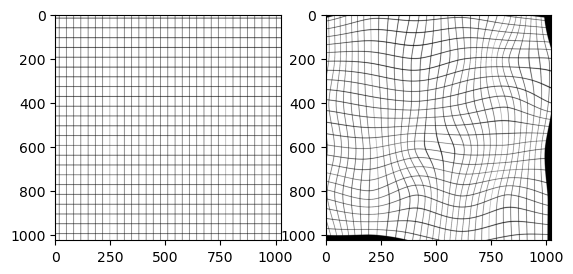

In [92]:
source_image, warped_image = tsp_transform_grid(transforms_pd)

fig, axs = plt.subplots(1,2)
axs[0].imshow(np.squeeze(source_image))
axs[1].imshow(warped_image)

## MRI training data

In [14]:
import glob

columns = ['ImageA','ImageB']
for i in range(1,73):
    columns.append('t' + str(i))
    
print(columns)
mri_pd = pd.DataFrame(columns=columns)

number_samples   = 0

file_names =  [i[20:] for i in glob.glob('./datasets/training/mri_*')]

for name in file_names: 
    new_row     = random_transform(transforms_pd, name)
    new_row_pd  = pd.DataFrame.from_dict(new_row)
    mri_pd      = pd.concat((mri_pd, new_row_pd), ignore_index=True)
    
    number_samples += 1

print(number_samples)
mri_pd.to_csv('training_data/tps/mri_train.csv', index=False)
mri_pd

['ImageA', 'ImageB', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53', 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72']
82


,ImageA,ImageB,t1,t2,t3,t4,t5,t6,t7,t8,...,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72
0,mri_TCIA-0014_12.jpg,mri_TCIA-0014_12.jpg,-1.050146,-1.073208,-1.026664,-0.929236,-1.034979,-1.043011,-0.608692,-0.593154,...,-0.243901,0.283435,0.680424,1.014714,-0.983431,-0.582678,-0.212672,0.184505,0.578867,1.065614
1,mri_TCIA-0018_12.jpg,mri_TCIA-0018_12.jpg,-1.093083,-1.052844,-1.098602,-1.027411,-0.952270,-1.077302,-0.529969,-0.573118,...,-0.298746,0.138182,0.616955,0.946693,-1.092706,-0.578223,-0.290377,0.196578,0.534726,1.034402
2,mri_TCIA-0006_12.jpg,mri_TCIA-0006_12.jpg,-0.972580,-0.968175,-1.045481,-1.067606,-0.993101,-0.951349,-0.611427,-0.594547,...,-0.226798,0.278542,0.610773,0.923185,-1.003435,-0.669869,-0.270815,0.191685,0.595397,1.012747
3,mri_TCIA-0006_13.jpg,mri_TCIA-0006_13.jpg,-0.905248,-1.006544,-0.985956,-1.034906,-0.923602,-0.926489,-0.502759,-0.633202,...,-0.205808,0.164635,0.604637,1.029689,-1.041400,-0.500162,-0.103179,0.275487,0.561219,0.974275
4,mri_TCIA-0022_12.jpg,mri_TCIA-0022_12.jpg,-0.994414,-1.044691,-1.021904,-0.937729,-0.956838,-1.093216,-0.526689,-0.528565,...,-0.243697,0.273393,0.602468,0.985000,-0.950485,-0.638601,-0.217238,0.272857,0.582480,1.090789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,mri_TCIA-0013_14.jpg,mri_TCIA-0013_14.jpg,-1.038638,-0.925464,-0.919698,-0.957376,-1.046177,-0.999011,-0.602495,-0.642171,...,-0.136212,0.249365,0.694535,0.939126,-0.971165,-0.603990,-0.276157,0.239047,0.562862,0.935199
78,mri_TCIA-0014_09.jpg,mri_TCIA-0014_09.jpg,-0.923596,-0.930888,-0.936815,-0.916203,-1.095761,-1.053364,-0.613379,-0.672878,...,-0.110227,0.103356,0.590221,0.980127,-0.906847,-0.577611,-0.294958,0.253077,0.691596,1.026418
79,mri_TCIA-0018_09.jpg,mri_TCIA-0018_09.jpg,-0.989960,-1.072653,-0.946123,-1.095129,-0.992825,-0.961057,-0.648052,-0.658769,...,-0.227948,0.149784,0.653882,1.081518,-1.008222,-0.511577,-0.263805,0.201050,0.644243,0.991431
80,mri_TCIA-0011_10.jpg,mri_TCIA-0011_10.jpg,-1.019705,-0.990365,-0.958184,-1.055621,-0.984232,-0.913521,-0.640438,-0.632920,...,-0.278869,0.140052,0.500821,1.095774,-1.033633,-0.677672,-0.189597,0.125658,0.653138,1.063523
